# Multi-class Classification: Logistic Regression

This notebook contains the first part of the Programming Exercise 3 of the Andrew Ng's course on Coursera.

Implement a multi-class classification model using Logistic Regression to recognize handwritten numbers (0-9). We will extend the LogReg model from exercise 2. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and visualizing data

In [4]:
# Load the data (in .mat format)
from scipy.io import loadmat
data = loadmat('ex3data1.mat')

In [13]:
# The matrix X contains a set of 5000 grayscale training images (20px x 20px) where each pixel is a float representing the grayscale intensity. 
# The 400 pixels (20x20) of each image are actually unrolled into a 400 dimensions array 
# Each row of X represents a single image. Each column a pixel of all images

# X = [         px1  px2  px3  px4  ... px400 
# image 1 =>    0.0, 0.0, 0.2, 0.4  ...  0.0        
# image 2 =>    0.0, 0.1, 0.2, 0.2  ...  0.0        
# image 3 =>    0.0, 0.0, 0.0, 0.2  ...  0.0        
# ...           ...
# image 5000 => 0.0, 0.0, 0.1, 0.2  ...  0.0

# The matrix X contains a set of 5000 grayscale training images (20px x 20px) where each pixel is a float representing the grayscale intensity. 
# The 400 pixels (20x20) of each image are actually unrolled into a 400 dimensions array 
# Each row of X represents a single image. Each column a pixel of all images

# Y = [         number
# image 1 =>    1     
# image 2 =>    7        
# image 3 =>    3       
# ...           ...
# image 5000 => 9

X = data['X']
y = data['y']
X.shape, y.shape

((5000L, 400L), (5000L, 1L))

In [20]:
# Helper functions to visualize the data (from https://github.com/kaleko/CourseraML/blob/master/ex3/ex3.ipynb)

import scipy.misc #Used to show matrix as an image
import random #To pick random images to display
import matplotlib.cm as cm #Used to display images in a specific colormap

def getDatumImg(row):
    # Function that is handed a single np array with shape 1x400, creates an image object from it, and returns it
    width, height = 20, 20
    square = row[0:].reshape(width,height)
    return square.T

def displayData(indices_to_display = None):
    # Function that picks 100 random rows from X, creates a 20x20 image from each, then stitches them together into a 10x10 grid of images, and shows it
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

array([[ 8,  5, 10,  3,  4,  6,  1,  5,  4,  2],
       [ 1,  2,  5,  4,  4,  4, 10,  4,  4,  5],
       [ 3,  1,  9,  8,  6,  1,  4,  7, 10,  7],
       [ 4,  7,  3, 10,  6,  8,  8,  3,  4, 10],
       [10,  6,  6,  7,  7,  4,  4,  8, 10,  4],
       [ 4,  3,  6,  7,  5,  6,  4,  3,  1,  4],
       [ 8,  9,  3,  6, 10,  1,  2,  7,  2,  2],
       [ 8,  5, 10, 10,  3,  4,  5,  3,  8,  1],
       [ 3, 10,  5,  1, 10,  2,  2,  1,  6,  2],
       [ 4,  8,  3,  3,  8,  9,  9,  2,  8,  4]], dtype=uint8)

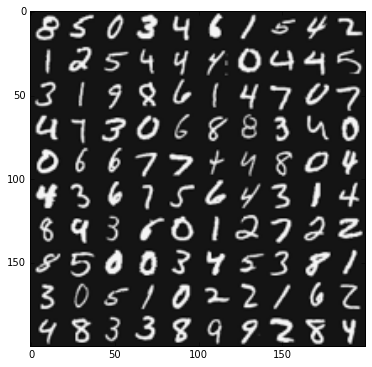

In [44]:
# let's visualize 100 random rows of X with the corresponding labels in y
indices_to_display = random.sample(range(X.shape[0]),100)
displayData(indices_to_display)
y[indices_to_display].reshape(10,10)

## Vectorized Logistic Regression Model